MidTerm Project Data 601

The source URL for the data is https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

Direct Data Source: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

This dataset is available for the general public through the website of the Center for Machine Learning and Intelligent Systems (University of California, Irvine). Accessing this data does not violate any laws. This specific dataset has been previously analyzed in two publications.

There are 45211 rows, 17 columns in this dataset and the file is 4503 kB.

I choose this dataset as my previous academic background was business and I have professional experience in finance and marketing. So I think I have the knowledge to develop hypotheses, understand and analyze the data.

At first, I have used some techniques to clean the data such as remove duplicate rows, null value if there is any.I have used head and tail function for sanity checks. I have showed some attributes through the visualization. Then I have calculated some statistical matrices such as standard deviation, mean, minimum value, maximum value, etc to understand my data better and find any inconsistencies.

My analysis is separated into two sections. The first section is to find out answers to the following question:
1. What is the overall success and failure rate of the campaign? 
2. Did the number of the call made to each customer affect their decision to invest in a term deposit?
3. Did call duration influence customers' decisions? 
4. Did clients' current balance have any influence over their decision?

The second part of the analysis is based on a hypothesis. I hypothesize that most of the clients who have subscribed "Term Deposit" campaign are those who were successful clients in their last campaign. Because loyal customers tend to take different offers or services from their preferred organization. However, I will test the data available to see if that hypothesis is true and what other results I can interpret from this. 




In [1]:
#At first, importing Pandas to help with the analysis of the csv data file.
# Using Matplotlib to plot the graphics.
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Next, the csv file will be assigned to a Pandas dataframe, 'df'.
df = pd.read_csv("bank-full.csv", sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# Number of total columns and rows
df.shape

(45211, 17)

No inconsistencies in the data are found. I wish they had a column for "year" to input information on which year they received the responses from their customers. The column "year" could have been a significant attribute than the column "day". Then I can explain my result in another way.

Data Cleaning & Sanity checking: 


In [5]:
#Checking if any NaN value in the entire dataframe then dropping corresponding rows
if df.isnull().values.any():
    print(df.isnull().sum())
    df = df.dropna(how='any').copy()

In [6]:
df.shape

(45211, 17)

In [7]:
#Removing any duplicate rows if any
df.drop_duplicates(inplace=True)
df.shape

(45211, 17)

In [8]:
#Dropping any unnecessary columns which i do not need for this analysis.
to_drop = ['contact','day','pdays','default']
df.drop(to_drop, inplace=True, axis=1)
df.shape


(45211, 13)

There is no NaN value in the data set.No duplicate row is found as well.I have removed some of the columns which I do not need for my analysis. 

In [9]:
#Check whether modification is done successfully or not I used head() and tail() method.
df.head()
df.tail()

,age,job,marital,education,balance,housing,loan,month,duration,campaign,previous,poutcome,y
45206,51,technician,married,tertiary,825,no,no,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,no,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,5715,no,no,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,nov,508,4,0,unknown,no
45210,37,entrepreneur,married,secondary,2971,no,no,nov,361,2,11,other,no


In [10]:
df.tail()

,age,job,marital,education,balance,housing,loan,month,duration,campaign,previous,poutcome,y
45206,51,technician,married,tertiary,825,no,no,nov,977,3,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,no,nov,456,2,0,unknown,yes
45208,72,retired,married,secondary,5715,no,no,nov,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,668,no,no,nov,508,4,0,unknown,no
45210,37,entrepreneur,married,secondary,2971,no,no,nov,361,2,11,other,no


In [11]:
# Here I defined some functions to help me in visualization and analysis.
def show_stats(val, title, xlabel, ylabel, color='orange'):
    val.plot.bar(title=title, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

def subscription_based_on_more_than_mean_call_duration(df):
    mean_call_duration = df['duration'].mean()
    return dict(df[df['duration']>mean_call_duration].groupby(['y']).size())

def calculate_percentage(val):
    percentage_yes = round((100*val['yes'])/(val['yes']+val['no']),2)
    percentage_no = round((100*val['no'])/(val['yes']+val['no']),2)
    return "Success rate: "+str(percentage_yes), "Failure rate: "+str(percentage_no)


Visualization of different attributes


Text(0, 0.5, 'Number of clients')

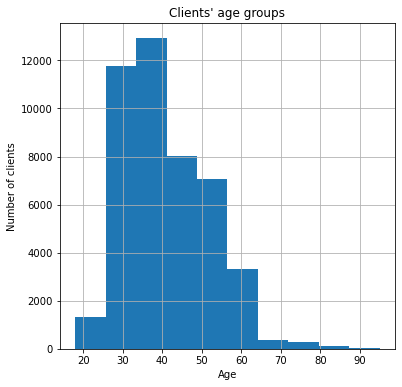

In [12]:
#Show distribution of clients based on age df.hist(column='age')
df.hist(column='age', figsize=(6,6))
plt.title("Clients' age groups")
plt.xlabel('Age')
plt.ylabel('Number of clients')

Bank clients' age ranges from 18 to 95 years. Most of its' clients are 26 to 41 years old.

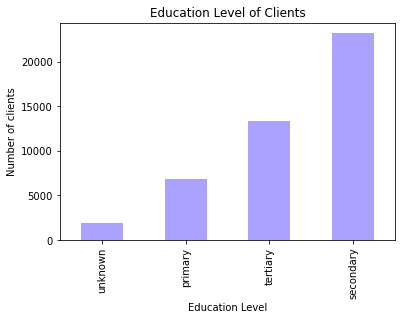

In [13]:
# Now, we will look at the Number of clients by their education level 
education= df.groupby('education').size().sort_values()
show_stats(education,'Education Level of Clients','Education Level','Number of clients', '#AAA2FE')

The highest level of education of the clients is secondary and the lowest level is unknown.

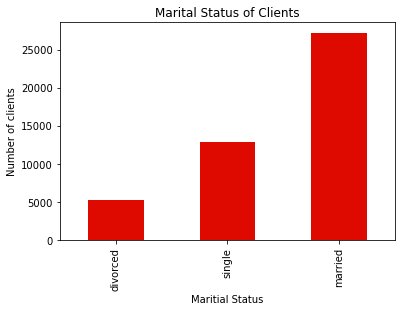

In [14]:
# Let's look at the Number of clients by their marital status 
marital_status= df.groupby('marital').size().sort_values()
show_stats(marital_status,'Marital Status of Clients','Maritial Status','Number of clients', '#DE0A00')

Most of the clients are married and the least are divorced. 

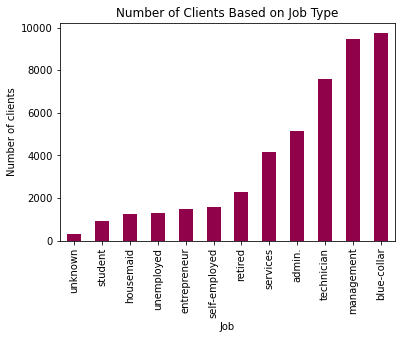

In [15]:
#We will look at the Number of clients by job type through bar graph
job= df.groupby('job').size().sort_values()
show_stats(job,'Number of Clients Based on Job Type','Job','Number of clients', '#90024A')

There are total 12 unique job types.Most of the clients have blue-collar jobs followed by management and technician jobs. The least members' job type is unknown. 

Summary statistics for numerical columns in the DataFrame. Different statistical value will be for my analysis.

In [16]:
df[['age','balance','duration','campaign']].describe()

,age,balance,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841
std,10.618762,3044.765829,257.527812,3.098021
min,18.000000,-8019.000000,0.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000
75%,48.000000,1428.000000,319.000000,3.000000
max,95.000000,102127.000000,4918.000000,63.000000


The first part of my analysis:
I want to find out answers to some questions so that I can interpret whether some factors influenced customers' decisions or not.   

# Qs 1. What was the overall success and failure rate of the campaign? 


In [17]:
success_failure= df.groupby('y').size()
print("Overall success and failure rate", calculate_percentage(dict(success_failure)))

Overall success and failure rate ('Success rate: 11.7', 'Failure rate: 88.3')


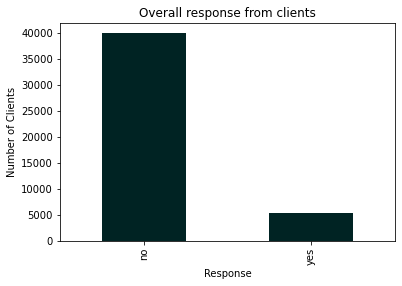

In [18]:
show_stats(success_failure,'Overall response from clients','Response','Number of Clients', '#002323')

This campaign's success rate was considerably low. Either the bank can focus more on training its' employees or try different approaches to increase the number of customers.

# Qs 2.Did the number of the call made to each customer affect their decision to invest in a term deposit?

In [19]:
df.groupby(["campaign","y"]).size()

campaign  y  
1         no     14983
          yes     2561
2         no     11104
          yes     1401
3         no      4903
                 ...  
50        no         2
51        no         1
55        no         1
58        no         1
63        no         1
Length: 70, dtype: int64

In [20]:
number_call= df[df['campaign']>= df.campaign.mean()].groupby('y').size()

In [21]:
print("Number of call based on more than mean", calculate_percentage(dict(number_call)))

Number of call based on more than mean ('Success rate: 8.75', 'Failure rate: 91.25')


My initial thought was that the number of calls made to each customer would convince him to open a term deposit account. More calls suggest that the customer was given more attention or that more details were given. However, the number of calls made had no effect on the success rate. I take the numbers of call made greater than "mean" value to determine the result. 

# Qs 3. Did call duration influence customers' decisions? 


In [22]:
df.groupby(['duration','y']).size()

duration  y  
0         no      3
1         no      2
2         no      3
3         no      4
4         no     15
                 ..
3366      no      1
3422      no      1
3785      no      1
3881      yes     1
4918      no      1
Length: 2627, dtype: int64

In [23]:
# I want to see if we call duration affect tern deposit or not.
print ("Clients' response:", subscription_based_on_more_than_mean_call_duration(df))

Clients' response: {'no': 11205, 'yes': 3827}


For this,I also take call durations that are greater than the mean value to see whether customer service representatives take longer to persuade a client to enroll in the campaign. I can conclude two consequences from this. The first one is the call length did not affect the amount of term deposit subscriptions.  The second explanation is that some inexperienced consultants took an excessive amount of time but failed to convince the client.

# Qs 4. Did clients' current balance have any influence over their decision?

In [24]:
balance = df[df['balance'] >= df['balance'].mean()].groupby('y').size()

In [25]:
print("Based on more than mean balance", calculate_percentage(dict(balance)))

Based on more than mean balance ('Success rate: 15.99', 'Failure rate: 84.01')


For customers who had bank deposits more than the "mean" balance, their success rate in subscribing to term deposit is almost 15 percent. Even though people had more money in the bank, they did not invest in a term deposit. So current balance did not have any influence over customer decisions. 

# Data analysis based on a hypothesis: 
My second analysis is based on a hypothesis. I hypothesize that the majority who signed up for the "term deposit" campaign was the repeat customer. These clients were also involved in previous campaigns. So there is a positive relationship between the previous campaign's and this campaign's success rate.

In [26]:
#taking "success" from "poutcome" column so i can get show who subscribed to term deposit from those. 
df[df['poutcome']=='success'].head()

,age,job,marital,education,balance,housing,loan,month,duration,campaign,previous,poutcome,y
24080,56,technician,married,secondary,589,yes,no,oct,518,1,2,success,yes
24165,30,admin.,married,secondary,873,yes,no,nov,119,1,3,success,no
24239,48,admin.,divorced,secondary,295,yes,no,nov,123,1,2,success,no
24264,49,management,married,tertiary,64,no,no,nov,208,1,1,success,no
24435,42,technician,married,tertiary,14282,yes,no,nov,77,1,4,success,no


In [27]:
previous_success = df[df['poutcome']=='success'].groupby('y').size()

In [28]:
#Let's see what percentage of clients subscribed to term deposit only from successful clients from poutcome(previous campaign)
print("Based on previous successfull campaign", calculate_percentage(dict(previous_success)))


Based on previous successfull campaign ('Success rate: 64.73', 'Failure rate: 35.27')


In [29]:
#taking "failure" from "poutcome" column so i can get show who did not subscribe to term deposit from those. 

df[df['poutcome']=='failure'].head()

,age,job,marital,education,balance,housing,loan,month,duration,campaign,previous,poutcome,y
24060,33,admin.,married,tertiary,882,no,no,oct,39,1,3,failure,no
24064,33,services,married,secondary,3444,yes,no,oct,144,1,4,failure,yes
24077,36,management,married,tertiary,0,yes,no,oct,140,1,3,failure,yes
24127,51,admin.,single,secondary,3132,no,no,nov,449,1,1,failure,no
24151,33,unemployed,divorced,secondary,1005,yes,no,nov,175,1,2,failure,no


In [30]:
previous_failure = df[df['poutcome']=='failure'].groupby('y').size()

In [31]:
#Let's see what percentage of clients subscribed to term deposit only from  "failur" from poutcome(previous campaign)
print("Based on previous failure campaign", calculate_percentage(dict(previous_failure)))

Based on previous failure campaign ('Success rate: 12.61', 'Failure rate: 87.39')


The majority of the clients who invested in term deposits had also invested in the previous campaign. Clients that did not subscribe to the previous project have a lower subscription rate in this one as well. As a result, my theory is right, as the majority of the successful term deposit campaign's clients were also previous campaign's clients.

Conclusion:

From the answer to my questions, I have tried to find out whether some factors influence customers' decisions or not.
In the 2nd part of my analysis, the result matched with my hypothesis. Successful Clients from the previous campaign were part of this campaign too. That indicates these customers are committed to this organization. The bank received most of the positive responses from these loyal customers while those who were not involved in the previous project gave the bank the least positive feedback. So, the next time the bank runs a scheme, they should concentrate on these loyal clients because the success rate is more than 50%. 

From this project,I have learned how to do a analysis from scratch.I have also defined functions and used them in interpreting the different results.I have incorporated statistical matrices within python to get better results from my analysis.I offer my heartfelt gratitude to my professor and my classmates for their advice and assistance. 

